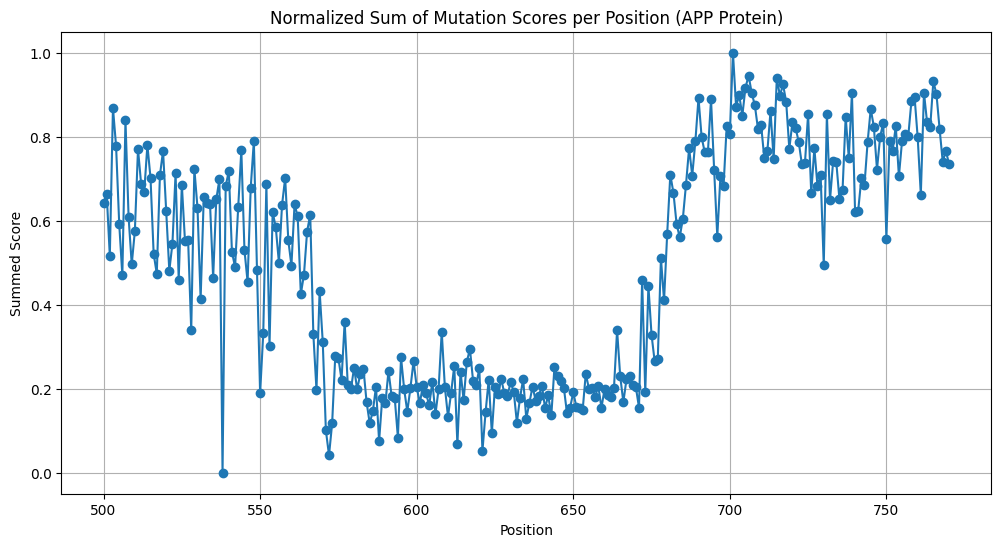

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('/Users/doma/Documents/Bachelor_Arbeit/Code/data/processed/ESM_mean_csv/P05067_mean_LLR.csv')

# Group by 'pos' and sum the 'score'
sum_scores = -df.groupby('position')['LLR_score'].sum()

# Focus only on positions 690 to 733
range_start, range_end = 500, 770
positions = list(range(range_start, range_end + 1))

# Ensure all positions are in the index
sum_scores = sum_scores.reindex(positions, fill_value=0)
abs_sum_scores = sum_scores


# Min-max normalization to range [0, 1]
normalized_scores = (sum_scores - sum_scores.min()) / (sum_scores.max() - sum_scores.min())

# Plot
plt.figure(figsize=(12, 6))
plt.plot(normalized_scores.index, normalized_scores.values, label="Normalized Damage Score", marker ='o')
plt.title("Normalized Sum of Mutation Scores per Position (APP Protein)")
plt.xlabel("Position")
plt.ylabel("Summed Score")
plt.grid(True)
plt.show()


In [3]:
# Load the CSV
df_CPP= pd.read_csv('/Users/doma/ml/AAanalysis/AA_bar_heights.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/doma/ml/AAanalysis/AA_bar_heights.csv'

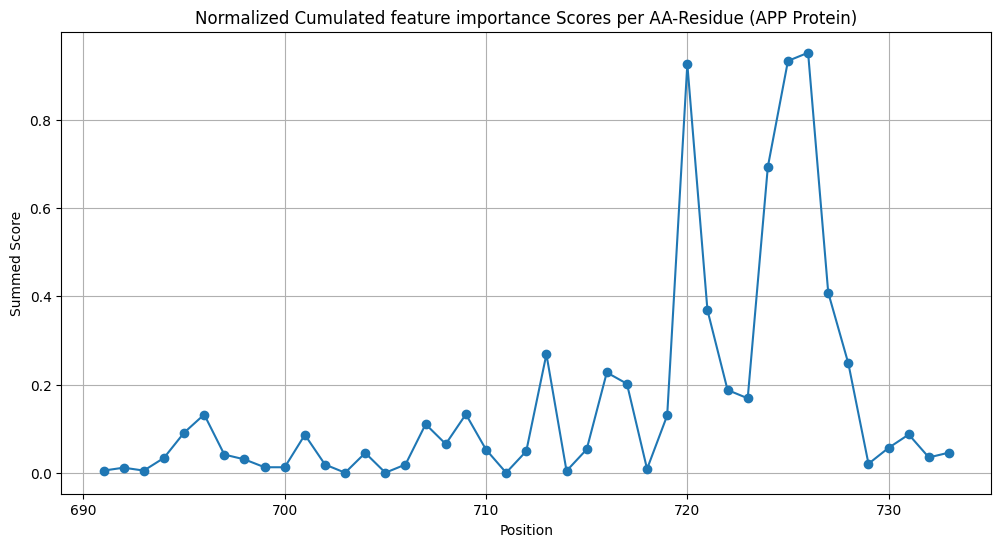

In [21]:
df_CPP

y_CPP_Values = df_CPP['normalized_importances']



# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_CPP['AA_position'], y_CPP_Values, label="Normalized Damage Score", marker ='o')
plt.title("Normalized Cumulated feature importance Scores per AA-Residue (APP Protein)")
plt.xlabel("Position")
plt.ylabel("Summed Score")
plt.grid(True)
plt.show()


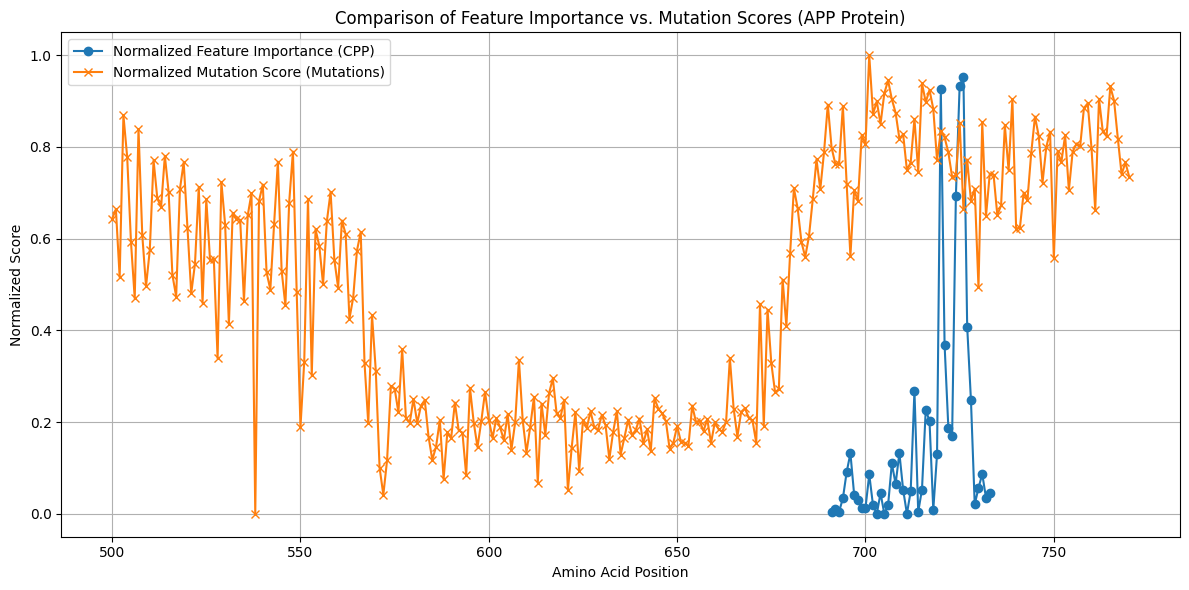

In [22]:
# plot against each other to check for correlations: 

# Hole die Positionen und die Werte für die beiden Kurven

y_CPP_Values = df_CPP['normalized_importances']
x_CPP = df_CPP['AA_position']

# Stelle sicher, dass die Scores auch korrekt reindiziert sind
normalized_scores = normalized_scores.reindex(positions, fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x_CPP, y_CPP_Values, label="Normalized Feature Importance (CPP)", marker='o')
plt.plot(normalized_scores.index, normalized_scores.values, label="Normalized Mutation Score (Mutations)", marker='x')

plt.title("Comparison of Feature Importance vs. Mutation Scores (APP Protein)")
plt.xlabel("Amino Acid Position")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# First, make sure both datasets align on the same positions

normalized_scores = normalized_scores.reindex(positions, fill_value=0)

# Create a new DataFrame with both values merged on position
df_combined = pd.DataFrame({
    'position': df_CPP['AA_position'],
    'feature_importance': df_CPP['normalized_importances'],
    'mutation_score': normalized_scores.values
})

# Plot: feature_importance (x-axis) vs mutation_score (y-axis)
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['feature_importance'], df_combined['mutation_score'], c='blue', alpha=0.7)
plt.title("Mutation Score vs. Feature Importance (APP Protein)")
plt.xlabel("Normalized Feature Importance")
plt.ylabel("Normalized Mutation Score")
plt.grid(True)
plt.tight_layout()
plt.show()



ValueError: array length 271 does not match index length 43

In [27]:
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt

# Calculate Pearson correlation
corr, p_value = pearsonr(df_combined['feature_importance'], df_combined['mutation_score'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3e}")

# Calculate linear regression
slope, intercept, r_value, p_value_reg, std_err = linregress(df_combined['feature_importance'], df_combined['mutation_score'])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['feature_importance'], df_combined['mutation_score'], c='blue', alpha=0.7, label='Data points')

# Add regression line
x_vals = df_combined['feature_importance']
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Linear fit (r={corr:.2f})')

plt.title("Mutation Score vs. Feature Importance (APP Protein)")
plt.xlabel("Normalized Feature Importance")
plt.ylabel("Normalized Mutation Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'df_combined' is not defined

### AlphaMissense

In [30]:
# the AlphaMissense .csv file is structured exactly the same like ESM1b
# AMS = AlphaMissense

# variant = protein_variant
# score = am_pathogenicity
# position = only in protein_variant M1K, M1D, ...

df_AMS = pd.read_csv('/Users/doma/ml/AAanalysis/AplhaFold_missense-P05067-F1-aa-substitutions.csv')

# as there are always 19 rows per 1 residue position:

#sum_scores_AMS = df_AMS.

df_AMS.head(10)

,protein_variant,am_pathogenicity,am_class
0,M1A,0.2406,LBen
1,M1C,0.2382,LBen
2,M1D,0.8484,LPath
3,M1E,0.6641,LPath
4,M1F,0.1225,LBen
5,M1G,0.4660,Amb
6,M1H,0.5356,Amb
7,M1I,0.2435,LBen
8,M1K,0.5007,Amb
9,M1L,0.0988,LBen


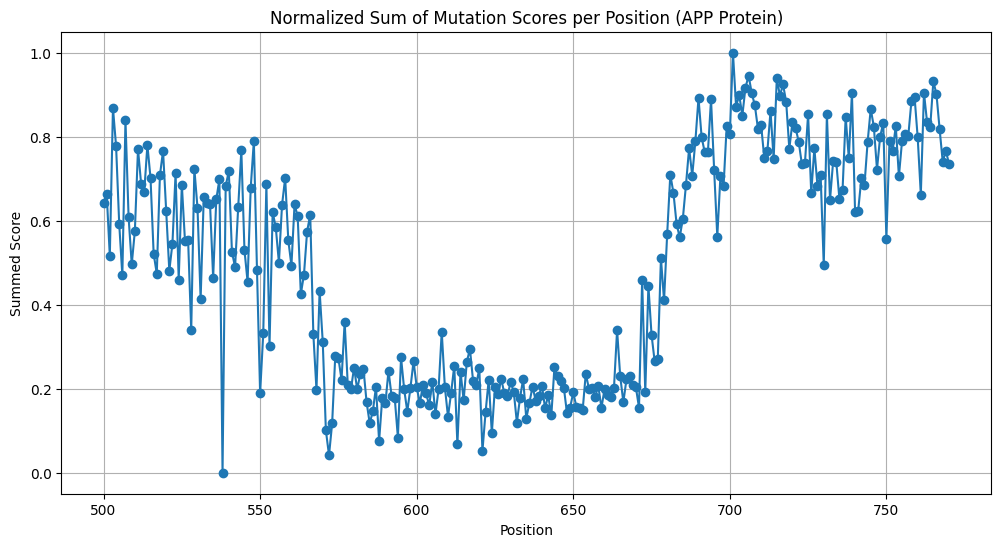

In [29]:
# Load the CSV
df = pd.read_csv('/Users/doma/ml/AAanalysis/APP_P05067.csv')

# Group by 'pos' and sum the 'score'
sum_scores = -df.groupby('pos')['score'].sum()

# Focus only on positions 690 to 733
range_start, range_end = 500, 770
positions = list(range(range_start, range_end + 1))

# Ensure all positions are in the index
sum_scores = sum_scores.reindex(positions, fill_value=0)
abs_sum_scores = sum_scores


# Min-max normalization to range [0, 1]
normalized_scores = (sum_scores - sum_scores.min()) / (sum_scores.max() - sum_scores.min())

# Plot
plt.figure(figsize=(12, 6))
plt.plot(normalized_scores.index, normalized_scores.values, label="Normalized Damage Score", marker ='o')
plt.title("Normalized Sum of Mutation Scores per Position (APP Protein)")
plt.xlabel("Position")
plt.ylabel("Summed Score")
plt.grid(True)
plt.show()


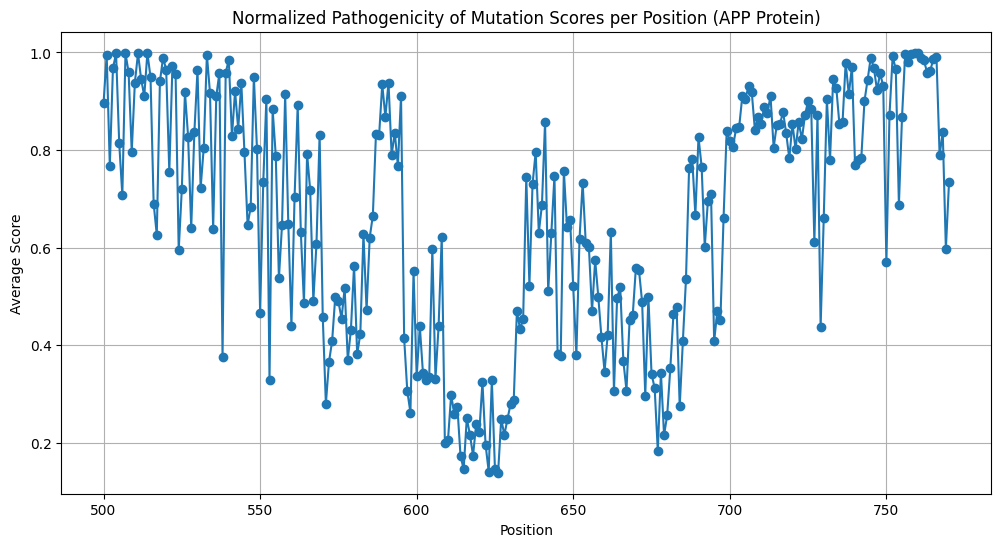

In [32]:
#df_AMS_20 = df_AMS.iloc[:20 , [0]]
#this gets you extra separate dataframe variable. not added to original dataframe df_AMS
#extracted = df_AMS_20['protein_variant'].str.extract(r'(\d+)').astype(int)     #\d means extract digit
#extracted.head(10)


# assign residue position to each protein_variant 
df_AMS['position'] = df_AMS['protein_variant'].str.extract(r'(\d+)').astype(int)
df_AMS.head(20)

# group and sum all pathogenicities per residue
sum_pat_AMS = df_AMS.groupby('position')['am_pathogenicity'].sum()
aver_sum_pat_AMS = sum_pat_AMS / 19        # as there are always only 19 variants to one residue position

# pick positions to check
range_startAMS, range_endAMS = 500, 770
positionsAMS = list(range(range_startAMS, range_endAMS + 1))

# Ensure all positions are in the index
aver_sum_pat_AMS = aver_sum_pat_AMS.reindex(positionsAMS, fill_value=0)
aver_sum_pat_AMS



# Plot
plt.figure(figsize=(12, 6))
plt.plot(aver_sum_pat_AMS.index, aver_sum_pat_AMS.values, label="Normalized Pathogenicity Score", marker ='o')
plt.title("Normalized Pathogenicity of Mutation Scores per Position (APP Protein)")
plt.xlabel("Position")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()

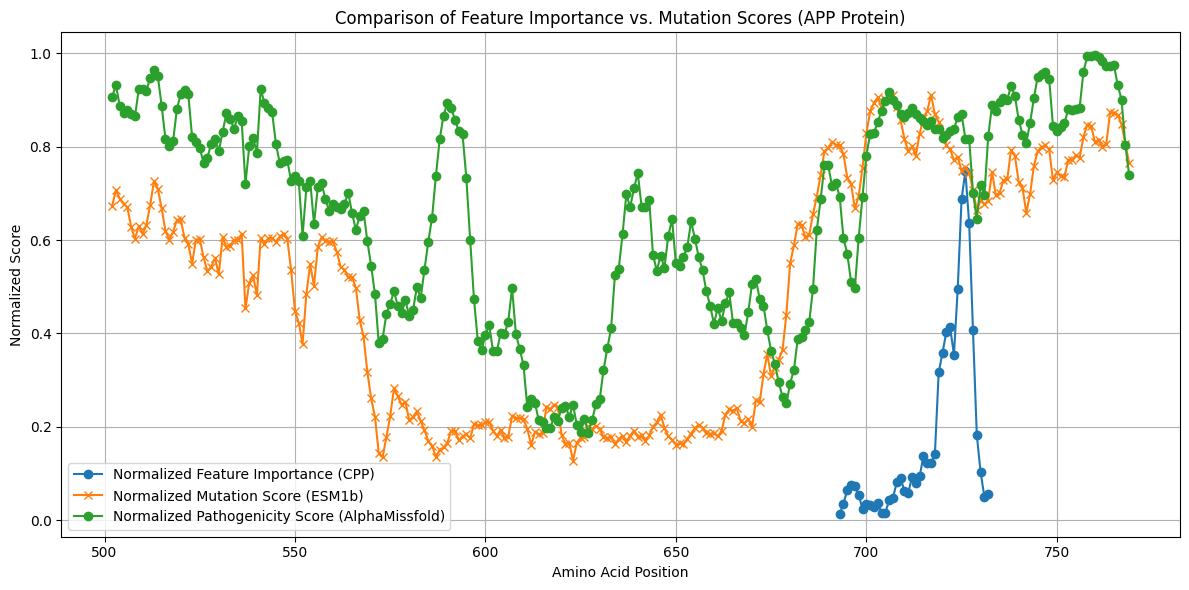

In [33]:
# Apply flow mean (rolling average) with window size of 4
import pandas as pd

y_CPP_Values_smoothed = pd.Series(y_CPP_Values).rolling(window=4, center=True).mean()
esm1b_smoothed = pd.Series(normalized_scores.values).rolling(window=4, center=True).mean()
ams_smoothed = pd.Series(aver_sum_pat_AMS.values).rolling(window=4, center=True).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x_CPP, y_CPP_Values_smoothed, label="Normalized Feature Importance (CPP)", marker='o')
plt.plot(normalized_scores.index, esm1b_smoothed, label="Normalized Mutation Score (ESM1b)", marker='x')
plt.plot(aver_sum_pat_AMS.index, ams_smoothed, label="Normalized Pathogenicity Score (AlphaMissfold)", marker='o')
plt.title("Comparison of Feature Importance vs. Mutation Scores (APP Protein)")
plt.xlabel("Amino Acid Position")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


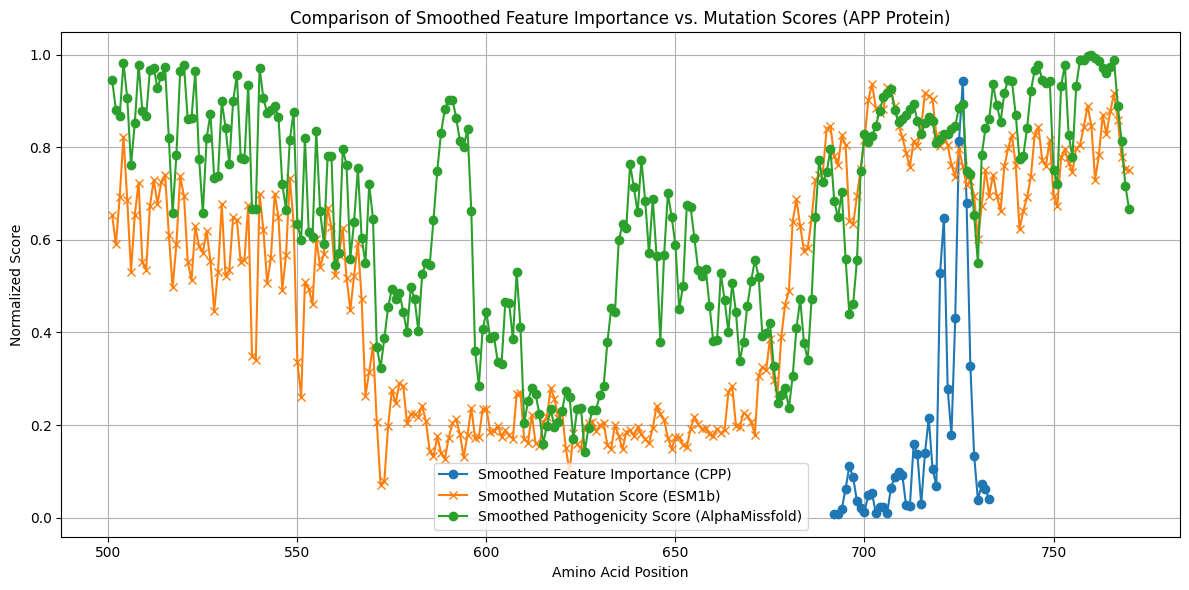

In [36]:
### import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
# Smoothing function: moving average
def smooth_series(x, y, window=2):
    x = pd.Series(x)
    y = pd.Series(y)
    y_smooth = y.rolling(window=window, center=True).mean()
    # Drop NaNs (at the edges) and return matching x/y
    valid = ~y_smooth.isna()
    return x[valid], y_smooth[valid]

# Smooth each series
x_CPP_smooth, y_CPP_smooth = smooth_series(x_CPP, y_CPP_Values)
x_esm_smooth, y_esm_smooth = smooth_series(normalized_scores.index, normalized_scores.values)
x_ams_smooth, y_ams_smooth = smooth_series(aver_sum_pat_AMS.index, aver_sum_pat_AMS.values)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x_CPP_smooth, y_CPP_smooth, label="Smoothed Feature Importance (CPP)", marker='o')
plt.plot(x_esm_smooth, y_esm_smooth, label="Smoothed Mutation Score (ESM1b)", marker='x')
plt.plot(x_ams_smooth, y_ams_smooth, label="Smoothed Pathogenicity Score (AlphaMissnse)", marker='o')

plt.title("Comparison of Smoothed Feature Importance vs. Mutation Scores (APP Protein)")
plt.xlabel("Amino Acid Position")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("Comparison_feature_importance_ESM1b_AlphaMisssense.png", dpi=300, bbox_inches='tight')  # You can change the filename/format

plt.show()

